# Mout Google **Drive** 


> To load Dataset  


*   For training
*   For validation
*   For testing 


In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# install the Dependencies
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"javaidahmad","key":"9fe784657d02977dbcae74d0ca3ea932"}'}

In [ ]:
!mkdir.kaggle

/bin/bash: mkdir.kaggle: command not found


In [ ]:
import json
token = {"username":"javaidahmad","key":"9fe784657d02977dbcae74d0ca3ea932"}
with open('/content/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "javaidahmad" # username from the json file
os.environ['KAGGLE_KEY'] = "9fe784657d02977dbcae74d0ca3ea932" # key from the json file
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset # api copied from kaggle

100% 2.70G/2.70G [00:41<00:00, 62.7MB/s]
100% 2.70G/2.70G [00:41<00:00, 69.7MB/s]


In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "javaidahmad" # username from the json file
os.environ['KAGGLE_KEY'] = "9fe784657d02977dbcae74d0ca3ea932" # key from the json file
!kaggle datasets download -d javaidahmad/test-new-plant-disease-dataset # api copied from kaggle

!ls



 81% 11.0M/13.6M [00:00<00:00, 29.7MB/s]
100% 13.6M/13.6M [00:00<00:00, 34.5MB/s]
drive	     new-plant-diseases-dataset.zip  test-new-plant-disease-dataset.zip
kaggle.json  sample_data


In [ ]:
!unzip -q test-new-plant-disease-dataset.zip -d .

replace ./test 38/Apple___Apple_scab/01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112_270deg.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip -q new-plant-diseases-dataset.zip -d .


# ***Install  prequest packages***

In [ ]:
import numpy as np
import tensorflow as tf
from pathlib import Path
from keras import  backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense , Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import matplotlib.image as mpimg
%matplotlib inline

print("Pacakages added ")

Using TensorFlow backend.


Pacakages added 


## **Path of Dataset for training , validation and testing**

In [ ]:
train_path = Path('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train')
test_path =  Path('/content/test 38')
valid_path = Path('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid')
print(train_path)
print(valid_path)
print(test_path)

/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train
/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid
/content/test 38


In [ ]:
batch_size = 128

train_batches = ImageDataGenerator().flow_from_directory(train_path,
                                                         target_size=(224,224), classes=['Apple___Apple_scab','Apple___Black_rot', 'Apple___Cedar_apple_rust',
                                                        'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy',
                                                        'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
                                                        'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight',
                                                        'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy',
                                                        'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)',
                                                        'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
                                                        'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy',
                                                        'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch',
                                                        'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight',
                                                        'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
                                                        'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'], batch_size=batch_size)


test_batches =  ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224), classes=['Apple___Apple_scab','Apple___Black_rot', 'Apple___Cedar_apple_rust',
                                                        'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy',
                                                        'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
                                                        'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight',
                                                        'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy',
                                                        'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)',
                                                        'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
                                                        'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy',
                                                        'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch',
                                                        'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight',
                                                        'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
                                                        'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'], batch_size=2)


valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224), classes=['Apple___Apple_scab','Apple___Black_rot', 'Apple___Cedar_apple_rust',
                                                        'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy',
                                                        'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
                                                        'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight',
                                                        'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy',
                                                        'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)',
                                                        'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
                                                        'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy',
                                                        'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch',
                                                        'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight',
                                                        'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
                                                        'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'], batch_size=batch_size)

Found 70295 images belonging to 38 classes.
Found 866 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
test_true_class = test_batches.class_indices
print(test_true_class)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___healthy': 5, 'Cherry_(including_sour)___Powdery_mildew': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___healthy': 9, 'Corn_(maize)___Northern_Leaf_Blight': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___healthy': 13, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___healthy': 21, 'Potato___Late_blight': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___healthy': 26, 'Strawberry___Leaf_scorch': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___healthy': 30, 'Tomato___L

# Loading vgg19 model

In [ ]:
import keras 
model = keras.applications.vgg19.VGG19(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

print(" vgg19-model")

574717952/574710816 [==============================] - 7s 0us/step
 vgg19-model


In [ ]:
model.summary()
print("\n \n \n \n \n summary of  model")

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:

vgg19_model = Sequential()
for layer in model.layers[:-1]:
    vgg19_model.add(layer)
print(' model copied')

 model copied


In [ ]:
vgg19_model.summary()
print("\n \n \n \n \n summary of  model")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:

for layer in vgg19_model.layers:
    layer.trainable = False

In [ ]:
vgg19_model.summary()
print('\n \n sscd')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
vgg19_model.add(Dense(38, activation = 'softmax'))
print('add last layer')

add last layer


In [ ]:
vgg19_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
vgg19_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

# Compile a model

In [ ]:

vgg19_model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=["accuracy"])
print('checked')

checked


In [ ]:
train_num = train_batches.samples
valid_num = valid_batches.samples

# ***Checkpoint to save the best accuracy ***

In [ ]:
!pwd
import os
os.chdir('/content/drive/My Drive')
!pwd"

/content
/bin/bash: -c: line 0: unexpected EOF while looking for matching `"'
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [ ]:

# checkpoint
from keras.callbacks import ModelCheckpoint
filepath = "/content/drive/My Drive/Plant disease/vgg19.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
print( "vgg19 model is stored at",filepath)

vgg19 model is stored at /content/drive/My Drive/Plant disease/vgg19.h5


In [ ]:

hist = vgg19_model.fit_generator(train_batches, steps_per_epoch=train_num//batch_size,
                    validation_data = valid_batches, validation_steps=valid_num//batch_size,
                    epochs = 30 ,callbacks=callbacks_list, verbose=1)

Epoch 1/30
549/549 [==============================] - 247s 450ms/step - loss: 0.4081 - accuracy: 0.8860 - val_loss: 0.3255 - val_accuracy: 0.8922

Epoch 00001: val_accuracy improved from -inf to 0.89216, saving model to /content/drive/My Drive/Plant disease/vgg19.h5


OSError: ignored

In [ ]:



vgg19_model.get_weights()

## ***Save model ***

In [ ]:
!pwd


/content/drive/My Drive/plant disease


In [ ]:
vgg16_model.save('vgg16_classifier.h5')
 
print('model saved with name vgg16-classifier.h5  at'  )
!pwd

model saved with name vgg16-classifier.h5  at
/content


# ***Loard the saved model***

In [ ]:
# from keras.models import load_model

# load_vgg16 = load_model("/content/drive/My Drive/plant disease/vgg16_classifier.h5")
# print("model loaded ssuccessfully")

# **Accuracy of Fine-tuned vgg16 model**

# Visualising Training Progress

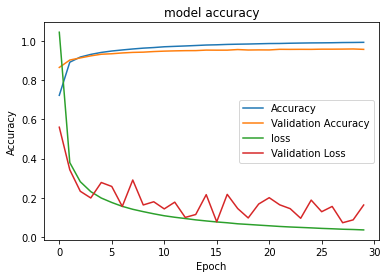

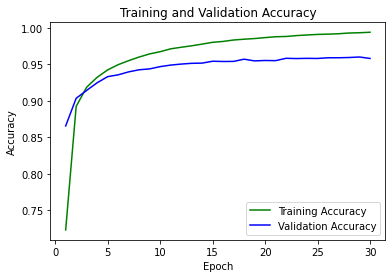

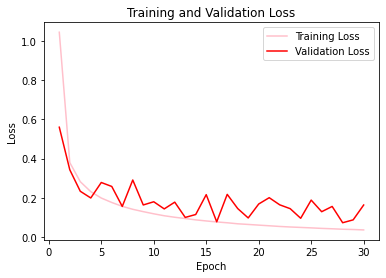

In [ ]:
#plotting training values

# hist = vgg16_model
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()


 #plot 2 graphs check code

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss1 = hist.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss1, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# ***Performance of the Model***

In [ ]:
accuracy = np.array(acc)
print('Training accuracy of fine-tuned vgg16  model is     :   '  , accuracy[-1]*100,'%' )
val_accuracy = np.array(val_acc)
print('Validation  accuracy of fine-tuned vgg16  model is  :   ' , val_accuracy[-1]*100,'%')

t_loss = np.array(loss)
print('training   loss of fine-tuned vgg16  model   is     :   ' , t_loss[-1]*100,'%')
val_loss = np.array(val_loss1)
print('Validation  loss of fine-tuned vgg16  model  is     :   ' , val_loss[-1]*100,'%')


Training accuracy of fine-tuned vgg16  model is     :    99.37577247619629 %
Validation  accuracy of fine-tuned vgg16  model is  :    95.78651785850525 %
training   loss of fine-tuned vgg16  model   is     :    3.593214200945115 %
Validation  loss of fine-tuned vgg16  model  is     :    16.30614697933197 %


#  Training  Accuracy
# and 
# Validation accuracy



In [ ]:
accuracy = np.array(acc)
print(' Training Accuracy of model is      :   '  , accuracy[-1]*100,'%' )

val_accuracy = np.array(val_acc)
print(' \n \n Validation  Accuracy of model is      :   '  , val_accuracy[-1]*100,'%' )

 Training Accuracy of model is      :    99.37577247619629 %
 
 
 Validation  Accuracy of model is      :    95.78651785850525 %


# test set

In [ ]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,20), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=20)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
print('checked')

checked


In [ ]:
imgs,test_labels = next(test_batches)
print('checked')

checked


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


checked


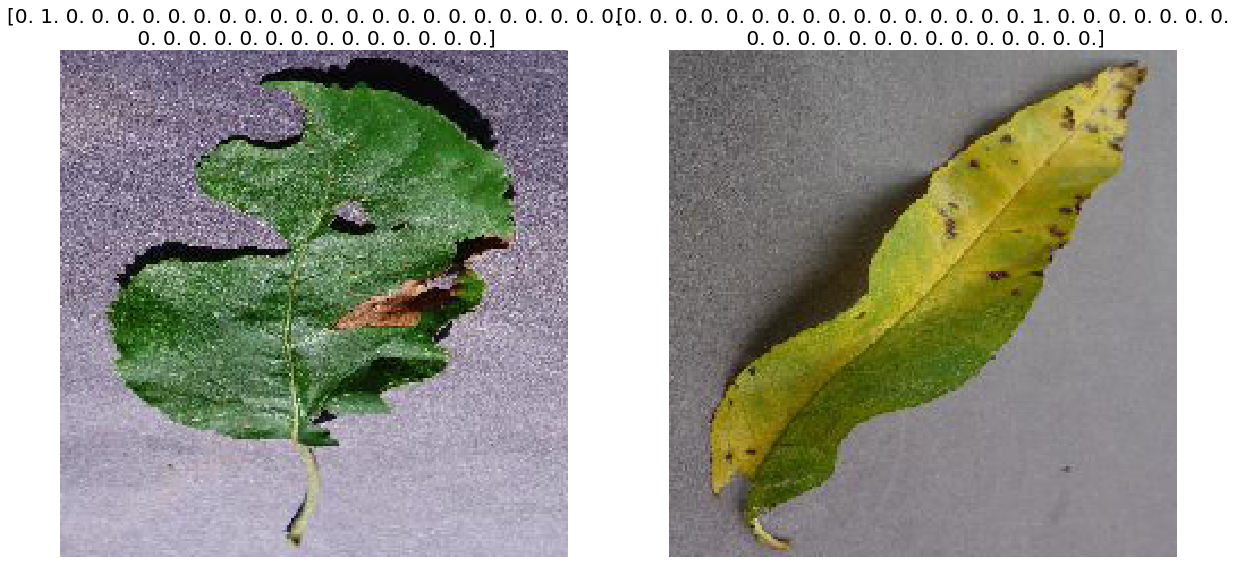

In [ ]:
# this is actually encording
plots(imgs,titles = test_labels)
print('checked')

In [ ]:
test_labels = test_labels[0:37]
test_labels
# print(imgs, result[:,0])

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]], dtype=float32)

# #Preductions

In [ ]:
predictions = vgg16_model.predict_generator(test_batches,steps=1,verbose=0)

In [ ]:
predictions

array([[2.00272143e-06, 9.98648226e-01, 4.05986800e-09, 9.54217469e-08,
        9.04317040e-13, 5.38311503e-15, 2.63239930e-10, 9.17420306e-12,
        8.37430208e-18, 9.53039369e-18, 6.31316333e-09, 1.02510285e-08,
        1.72197133e-06, 6.94967530e-05, 4.25632446e-11, 1.23052319e-18,
        5.62660687e-04, 6.68469674e-13, 1.32327996e-10, 1.23058192e-14,
        2.56188599e-08, 5.60707210e-12, 2.04239473e-10, 6.94994430e-15,
        1.41703108e-11, 3.98860722e-10, 6.79847021e-12, 1.52682554e-11,
        8.99693532e-07, 2.50494941e-06, 8.04303727e-06, 4.38055613e-05,
        4.05967633e-08, 6.56843768e-04, 8.42152112e-11, 3.74888054e-06,
        1.38022154e-08, 4.21400789e-13],
       [4.46988722e-08, 2.46066622e-11, 1.73224714e-06, 2.16372683e-07,
        6.57469901e-09, 4.10028088e-12, 1.69832532e-07, 1.03142755e-12,
        3.34740407e-14, 1.24798802e-14, 1.23329428e-05, 4.38160454e-14,
        2.15023498e-14, 6.96463173e-19, 5.93960513e-18, 2.79904095e-12,
        9.99978423e-01,

# ** code of confusion matrix**

In [ ]:
cm = confusion_matrix(test_labels,predictions[:,0])

ValueError: ignored

In [ ]:



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
  
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

ValueError: ignored

# *** confusion of test data***

# test set

In [ ]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,20), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=20)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
print('checked')

checked


In [ ]:
imgs,test_labels = next(test_batches)
print('checked')

checked


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


checked


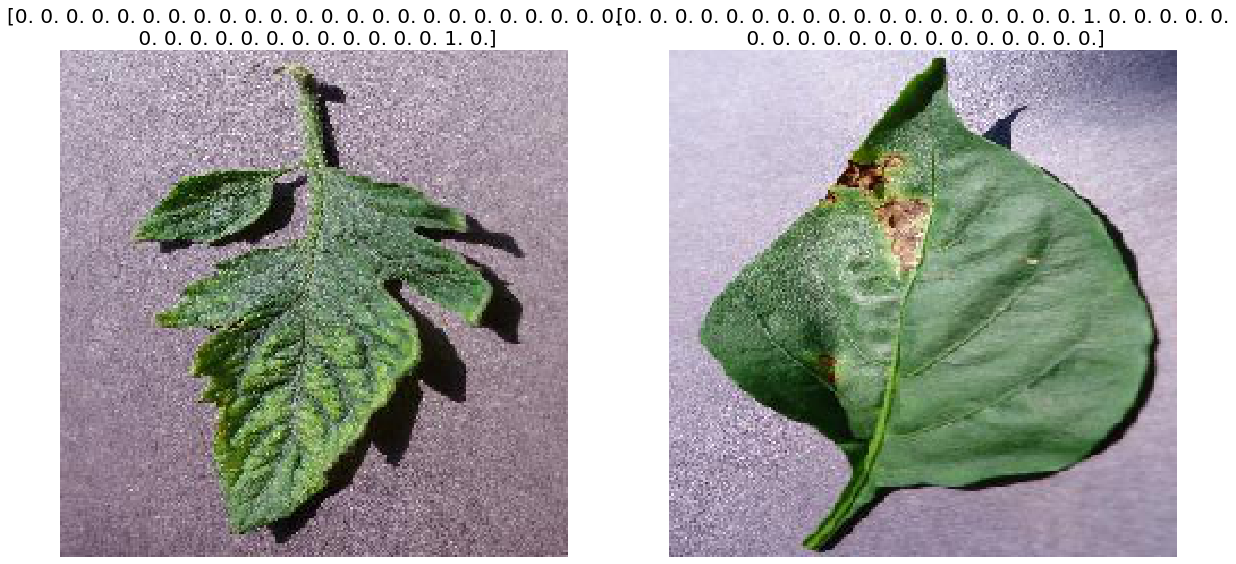

In [ ]:
# this is actually encording
plots(imgs,titles = test_labels)
print('checked')

In [ ]:
test_labels = test_labels[:,0]
test_labels
# print(imgs, result[:,0])

array([0., 0.], dtype=float32)

In [ ]:
test_batches =  ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224), classes=['Apple___Apple_scab','Apple___Black_rot', 'Apple___Cedar_apple_rust',
                                                        'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy',
                                                        'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
                                                        'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight',
                                                        'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy',
                                                        'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)',
                                                        'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
                                                        'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy',
                                                        'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch',
                                                        'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight',
                                                        'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
                                                        'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'], batch_size=20)

Found 866 images belonging to 38 classes.


# #Preductions

In [ ]:
predictions = vgg16_model.predict_generator(test_batches,steps=1,verbose=0)

In [ ]:
predictions

array([[1.36871363e-12, 7.27120475e-10, 5.24467691e-11, 5.43774303e-10,
        1.48213508e-09, 1.53723617e-10, 3.34925337e-10, 1.36317586e-14,
        4.16185867e-17, 5.73468098e-20, 1.08530329e-12, 6.80343944e-17,
        4.02185273e-12, 7.59011257e-11, 3.46834811e-13, 8.88760853e-12,
        5.16191603e-12, 5.28247042e-13, 1.83492807e-06, 6.92764743e-08,
        4.09386580e-10, 4.41575867e-05, 4.75812030e-08, 3.59782928e-12,
        9.99952674e-01, 4.32873494e-11, 7.24839839e-14, 4.51328021e-13,
        1.10706122e-09, 5.68092726e-11, 5.14747800e-10, 1.39019551e-09,
        2.77399875e-13, 1.95284580e-10, 1.88848992e-10, 1.20669529e-06,
        1.29310581e-17, 3.37247544e-15],
       [2.52274617e-06, 1.08346758e-04, 6.86163048e-06, 9.37640152e-08,
        7.29440570e-01, 3.62275227e-06, 1.34167552e-10, 7.69915243e-09,
        2.67618870e-12, 1.33507648e-14, 4.18047433e-13, 1.98812405e-14,
        8.79196482e-14, 1.92063219e-08, 8.73514411e-19, 7.58880285e-12,
        7.68909914e-09,

# **Calculate and plot confusion matrix:**

In [ ]:
import itertools

In [ ]:
# def plot_confusion_matrix(cm, classes, figname, normalize=False,
#                           cmap=plt.cm.Blues):
#   if normalize:
#     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#     print('Normalized confusion matrix')
#   else:
#     print('Confusion matrix, without normalization')
#   plt.figure(figsize=(8,8))
#   plt.title('Confusion Matrix')
#   tick_marks = np.arange(len(classes))
#   plt.xticks(tick_marks, classes, rotation=90)
#   plt.yticks(tick_marks, classes)
#   fmt = '.2f' if normalize else 'd'
#   thresh = cm.max() / 2.
#   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#     plt.text(j, i, format(cm[i, j], fmt),
#              horizontalalignment='center',
#              color='white' if cm[i, j] > thresh else 'black')
    
#   plt.ylabel('True label')
#   plt.xlabel('Predicted label')
#   plt.tight_layout()
#   plt.savefig(figname)




In [ ]:
# test_img, test_labells = next(test_batches)

In [ ]:
# Y_pred = vgg16_model.predict_generator(test_batches)
# y_pred = np.argmax(Y_pred, axis=1)

# cm = confusion_matrix(test_batches.classes, y_pred)
# plot_confusion_matrix(cm, classes = test_labels , normalize=False, figname = 'Confusion_matrix_concrete.jpg')

**Confusion matrix of testing data**

In [ ]:
# #Y_pred = model.predict_generator(test_generator)
# from keras.utils import to_categorical
# #One Hot Encoding
# x_test=to_categorical(test_batches.classes)


# Y_pred = vgg16_model.predict_generator(test_batches)
# y_test=to_categorical(Y_pred)

# y_pred = np.argmax(Y_pred, axis=1)

# cm = confusion_matrix(x_test, y_pred)
# plot_confusion_matrix(cm, classes = test_labels, title='Confusion Matrix of vgg16_model', normalize=False)

In [ ]:



# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')
  
#     print(cm)

#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, cm[i, j],
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')

# *** confusion of test data***

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

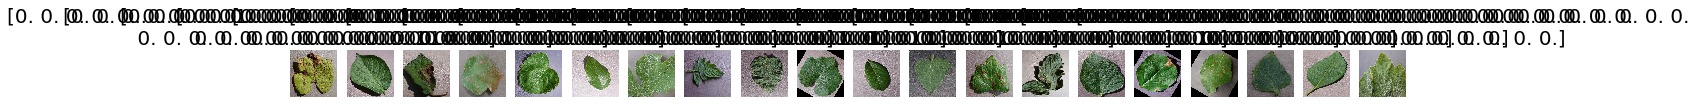

In [ ]:
test_img, test_labells = next(test_batches)

plots(test_img, titles=test_labells )
print(test_labells)

In [ ]:
predictions = vgg16_model.predict_generator(test_batches,steps=1,verbose=0)

NameError: ignored

In [ ]:
x_test=to_categorical(test_labells)
print(x_test)

[[[1. 0.]
  [1. 0.]
  [1. 0.]
  ...
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  ...
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  ...
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 ...

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  ...
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  ...
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  ...
  [1. 0.]
  [1. 0.]
  [1. 0.]]]


In [ ]:


y_pred=vgg16_model.predict_classes(test_batches, verbose = 1)
y_true=np.argmax(test_labells,axis=1)

ValueError: ignored

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

In [ ]:
#Plotting normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names, normalize = True, title = 'Normalized confusion matrix')

confusion matrix of VGG19 

In [ ]:
test_labels

array([0., 0.], dtype=float32)